In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

## Písně, které se točí v hodně letech, ale málo konkrétních týdnech

In [3]:
pd.Series(df.groupby(['track','interpret'])['rok'].nunique() / df.groupby(['track','interpret'])['tyden'].nunique()).sort_values(ascending=False).head(30)

track                            interpret                      
Thank God It´s Christmas         Queen                              2.50
Medvídek                         Lucie                              2.25
Christmas Is All Around          Billy Mack                         2.20
All I Want For Christmas Is You  Mariah Carey                       2.20
Sliby se maj plnit o Vánocích    Janek Ledecký                      2.00
Last Christmas                   Wham!                              2.00
Happy Xmas (War Is Over)         John Lennon                        2.00
Christmas Without You            Ava Max                            2.00
Na nebi svítí                    Dan Bárta                          1.75
Do They Know It´s Christmas?     Band Aid Ii.                       1.50
Vánoce na míru                   Ewa Farna                          1.20
Něco je ve vzduchu               Xindl X                            1.00
Obchodník s deštěm               Kryštof                   

Lol Medvídek, je tam SNÍH, jsou to VÁNOCE.

In [4]:
pd.Series(df.groupby(['track','interpret'])['rok'].nunique() / df.groupby(['track','interpret'])['tyden'].nunique()).sort_values(ascending=False).head(20)

track                            interpret                
Thank God It´s Christmas         Queen                        2.50
Medvídek                         Lucie                        2.25
Christmas Is All Around          Billy Mack                   2.20
All I Want For Christmas Is You  Mariah Carey                 2.20
Sliby se maj plnit o Vánocích    Janek Ledecký                2.00
Last Christmas                   Wham!                        2.00
Happy Xmas (War Is Over)         John Lennon                  2.00
Christmas Without You            Ava Max                      2.00
Na nebi svítí                    Dan Bárta                    1.75
Do They Know It´s Christmas?     Band Aid Ii.                 1.50
Vánoce na míru                   Ewa Farna                    1.20
Něco je ve vzduchu               Xindl X                      1.00
Obchodník s deštěm               Kryštof                      1.00
Occhi                            Zucchero                     1.00
Bla

## Písně, které mají Vánoce v názvu

In [5]:
df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates()

30598    Sliby se maj plnit o Vánocích
35665                      Vánoce bílý
56090             Vánoce hrajou glóriá
61089                   Vánoce na míru
81392                 Vánoce jako dřív
86494    O Vánocích (feat. Boni Pueri)
86695                Vánoce přicházejí
Name: track, dtype: object

In [6]:
df[df['track'].str.contains('Xmas')]['track'].drop_duplicates()

35676    Happy Xmas (War Is Over)
Name: track, dtype: object

In [7]:
df[df['track'].str.contains('Christm')]['track'].drop_duplicates()

10298                     Last Christmas
25250                 Shake Up Christmas
25475                   Christmas Lights
30377            Christmas Is All Around
30580    All I Want For Christmas Is You
35693           Thank God It´s Christmas
40778                    White Christmas
45638       Do They Know It´s Christmas?
50996           Merry Christmas Everyone
76351              Christmas Without You
81461                    Merry Christmas
Name: track, dtype: object

In [8]:
vanocni = df[df['track'].str.contains('Christm')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Xmas')]['track'].drop_duplicates().to_list() + df[df['track'].str.contains('Vánoc')]['track'].drop_duplicates().to_list() + df[df['track'].str.lower().str.contains('vánoč')]['track'].drop_duplicates().to_list()
vanocni.append("Půlnoční")

## Kdy se to dostává do top 100

<Axes: xlabel='tyden'>

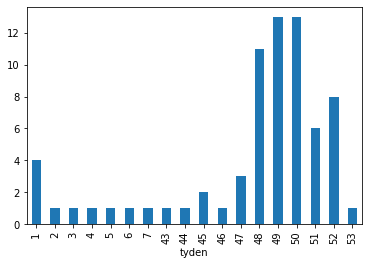

In [9]:
df[df['track'].isin(vanocni)].groupby("tyden")['rok'].nunique().plot.bar()

In [10]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [11]:
def cesta_pisne(seznam):
    pracovni = df
    pracovni = pracovni[(pracovni['track'].isin(seznam))].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()

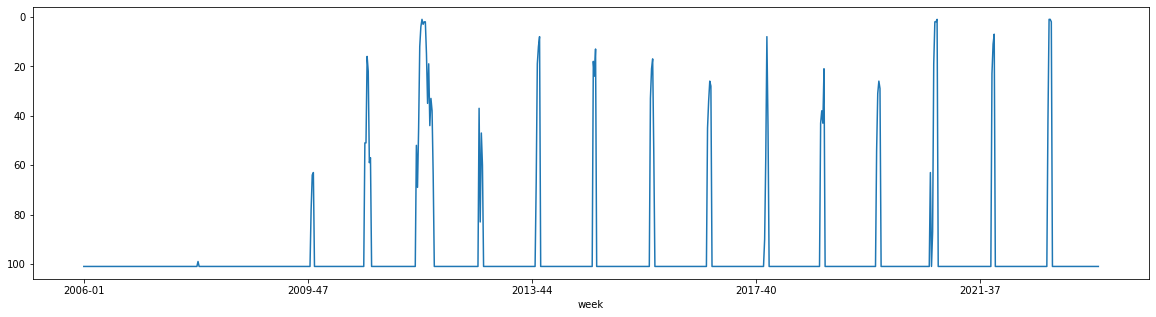

In [12]:
cesta_pisne(vanocni)

## Kdy nás ty tracky oblažily poprvé

In [13]:
df[df['track'].isin(vanocni)].groupby(['interpret','track'])['rok'].min().nsmallest(50)

interpret                          track                          
Wham!                              Last Christmas                     2008
Walda Gang                         Vánoční svařák                     2009
Train                              Shake Up Christmas                 2010
Lucie Vondráčková                  Vánoční strom                      2010
Coldplay                           Christmas Lights                   2010
Lucie Vondráčková Feat. R. Schwab  Vánoční přání                      2011
Václav Neckář & Umakart            Půlnoční                           2011
Janek Ledecký                      Sliby se maj plnit o Vánocích      2011
Mariah Carey                       All I Want For Christmas Is You    2011
Billy Mack                         Christmas Is All Around            2011
John Lennon                        Happy Xmas (War Is Over)           2012
Queen                              Thank God It´s Christmas           2012
Lucie Vondráčková & Kolář Petr   

## Český rozhlas

In [14]:
vanocni_l = [x.lower() for x in vanocni]

In [15]:
rz = pd.read_json(os.path.join("data","cro_raw.json"))

In [16]:
rz['since'] = rz['since'].apply(lambda x: x.replace("01:00","02:00"))

In [17]:
rz['den'] = pd.to_datetime(rz['since']).dt.dayofyear

In [18]:
rz['since']

0          2020-12-01T04:42:44+02:00
1          2020-12-08T18:25:47+02:00
2          2020-12-09T06:24:52+02:00
3          2020-12-10T18:05:36+02:00
4          2020-12-11T06:04:38+02:00
                     ...            
1067022    2023-10-21T11:56:56+02:00
1067023    2023-10-21T16:22:37+02:00
1067024    2023-10-22T13:53:15+02:00
1067025    2023-10-22T13:57:04+02:00
1067026    2023-10-22T23:26:45+02:00
Name: since, Length: 1067027, dtype: object

In [19]:
rz['datum'] = rz['since'].apply(lambda x: f"""{x[5:10]}""")

In [20]:
rz['track'] = rz['track'].apply(lambda x: x.lower())

In [21]:
rz[rz['track'].isin(vanocni_l)]

,since,id,interpret,interpret_id,track,track_id,stanice,den,datum
728,2020-12-01T07:04:55+02:00,10237476,KRYŠTOF & KAREL GOTT,25130,vánoční,84268,dvojka,336,12-01
765,2020-12-01T12:05:30+02:00,10238769,EWA FARNA,4499,vánoce na míru,46017,dvojka,336,12-01
820,2020-12-01T18:26:55+02:00,10240231,LUCIE VONDRÁČKOVÁ,3694,vánoční strom,15246,dvojka,336,12-01
843,2020-12-01T23:54:38+02:00,10240774,WHAM!,4520,last christmas,15138,dvojka,336,12-01
847,2020-12-02T00:19:10+02:00,10240821,KRYŠTOF & KAREL GOTT,25130,vánoční,84268,dvojka,337,12-02
...,...,...,...,...,...,...,...,...,...
976713,2022-12-26T10:15:00+02:00,16669025,MARIAH CAREY,3093,all i want for christmas is you,15232,radiozurnal,360,12-26
976724,2022-12-26T11:16:53+02:00,16669591,JOHN LENNON/ YOKO ONO,5548,happy xmas (war is over),15269,radiozurnal,360,12-26
976735,2022-12-26T12:21:07+02:00,16670206,BILLY MACK,5527,christmas is all around,15098,radiozurnal,360,12-26
976782,2022-12-26T18:35:20+02:00,16673046,DAVID DEYL & KRISTÍNA,31262,vánoční přání,104453,radiozurnal,360,12-26


In [22]:
vanocni_rz = rz[rz['track'].isin(vanocni_l)]

In [23]:
vanocni_rz.groupby('datum').size()

datum
01-04     1
01-12     1
01-17     2
01-24     1
02-01     1
         ..
12-25    49
12-26    54
12-29     1
12-30     1
12-31     1
Length: 74, dtype: int64